In [67]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
data = transactions.merge(customers, on='CustomerID')

data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,03-12-2022
1,T00761,C0199,P022,2024-10-01 05:57:09,4,550.16,137.54,Andrea Jenkins,Europe,03-12-2022
2,T00626,C0199,P079,2024-08-17 12:06:08,2,834.74,417.37,Andrea Jenkins,Europe,03-12-2022
3,T00963,C0199,P008,2024-10-26 00:01:58,2,293.70,146.85,Andrea Jenkins,Europe,03-12-2022
4,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,04-09-2024
...,...,...,...,...,...,...,...,...,...,...
995,T00774,C0095,P056,2024-01-07 14:19:49,2,32.16,16.08,William Walker,South America,04-03-2023
996,T00823,C0095,P079,2024-09-30 10:45:06,3,1252.11,417.37,William Walker,South America,04-03-2023
997,T00369,C0151,P082,2024-12-24 11:40:24,4,223.96,55.99,Amber Gonzalez,South America,22-11-2024
998,T00809,C0078,P075,2024-12-09 11:44:44,2,995.52,497.76,Julia Palmer,Asia,13-11-2024


In [69]:

# Aggregate features
customer_features = data.groupby('CustomerID').agg({
    'Region': 'first',
    'SignupDate': 'first',
    'Quantity': 'sum',        # Total quantity purchased
    'TotalValue': 'sum',      # Total value of transactions
    'ProductID': 'nunique'    # Unique products purchased
}).reset_index()
customer_features

,CustomerID,Region,SignupDate,Quantity,TotalValue,ProductID
0,C0001,South America,10-07-2022,12,3354.52,5
1,C0002,Asia,13-02-2022,10,1862.74,4
2,C0003,South America,07-03-2024,14,2725.38,4
3,C0004,South America,09-10-2022,23,5354.88,8
4,C0005,Asia,15-08-2022,7,2034.24,3
...,...,...,...,...,...,...
194,C0196,Europe,07-06-2022,12,4982.88,3
195,C0197,Europe,21-03-2023,9,1928.65,3
196,C0198,Europe,27-02-2022,3,931.83,2
197,C0199,Europe,03-12-2022,9,1979.28,4


In [70]:

# Add derived feature: years since signup
customer_features['SignupDate'] = pd.to_datetime(customer_features['SignupDate'], format='%d-%m-%Y')
customer_features['YearsSinceSignup'] = (pd.Timestamp.now() - customer_features['SignupDate']).dt.days / 365
customer_features.drop('SignupDate', axis=1, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
customer_features['Region'] = encoder.fit_transform(customer_features['Region'])

# Normalize features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(customer_features.iloc[:, 2:])


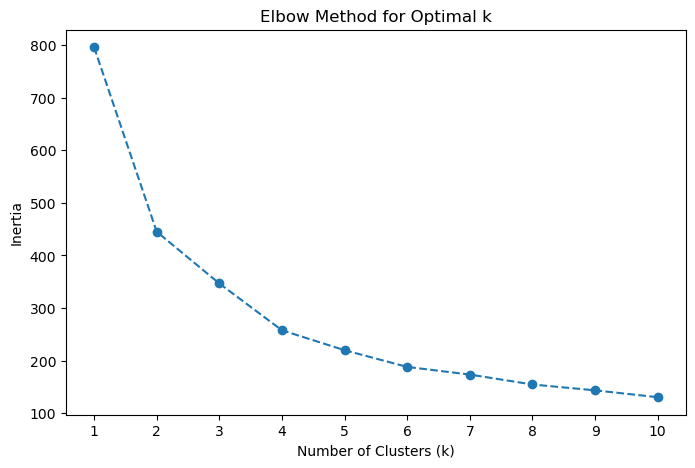

In [71]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(normalized_features)

# Determine the optimal k using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()


#### Based on the ***Elbow Method*** for Optimal K , I found 
### `K = 4` is the optimal for clustering

----

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Perform K-Means clustering
 
# Adjust based on Elbow Method
for num_clusters in range(2,8):
  kmeans = KMeans(n_clusters=num_clusters, random_state=42)
  customer_features['Cluster'] = kmeans.fit_predict(normalized_features)

  # Evaluate clustering metrics
  db_index = davies_bouldin_score(normalized_features, customer_features['Cluster'])
  silhouette_avg = silhouette_score(normalized_features, customer_features['Cluster'])
  print("\nNumber of Cluster = ",num_clusters,"")
  print(f'Davies-Bouldin Index: {db_index}')
  print(f'Silhouette Score: {silhouette_avg}')




Number of Cluster =  2 
Davies-Bouldin Index: 1.0410728842301356
Silhouette Score: 0.3694630637074159

Number of Cluster =  3 
Davies-Bouldin Index: 1.1327211055931976
Silhouette Score: 0.29183400361964584

Number of Cluster =  4 
Davies-Bouldin Index: 0.9456370948215488
Silhouette Score: 0.32722423482735064

Number of Cluster =  5 
Davies-Bouldin Index: 1.0199421412298983
Silhouette Score: 0.3075541505962609

Number of Cluster =  6 
Davies-Bouldin Index: 0.995887124733578
Silhouette Score: 0.3132671736290838

Number of Cluster =  7 
Davies-Bouldin Index: 1.0216858078008006
Silhouette Score: 0.28952060685950687


 ### Based on Davies-Bouldin score , **K=4** seems to be the optimal `K` value

----

  CustomerID  Region  Quantity  TotalValue  ProductID  YearsSinceSignup  \
0      C0001       3        12     3354.52          5          2.545205   
1      C0002       0        10     1862.74          4          2.947945   
2      C0003       3        14     2725.38          4          0.884932   
3      C0004       3        23     5354.88          8          2.295890   
4      C0005       0         7     2034.24          3          2.446575   

     Cluster  
0  Cluster B  
1  Cluster B  
2  Cluster C  
3  Cluster A  
4  Cluster B  


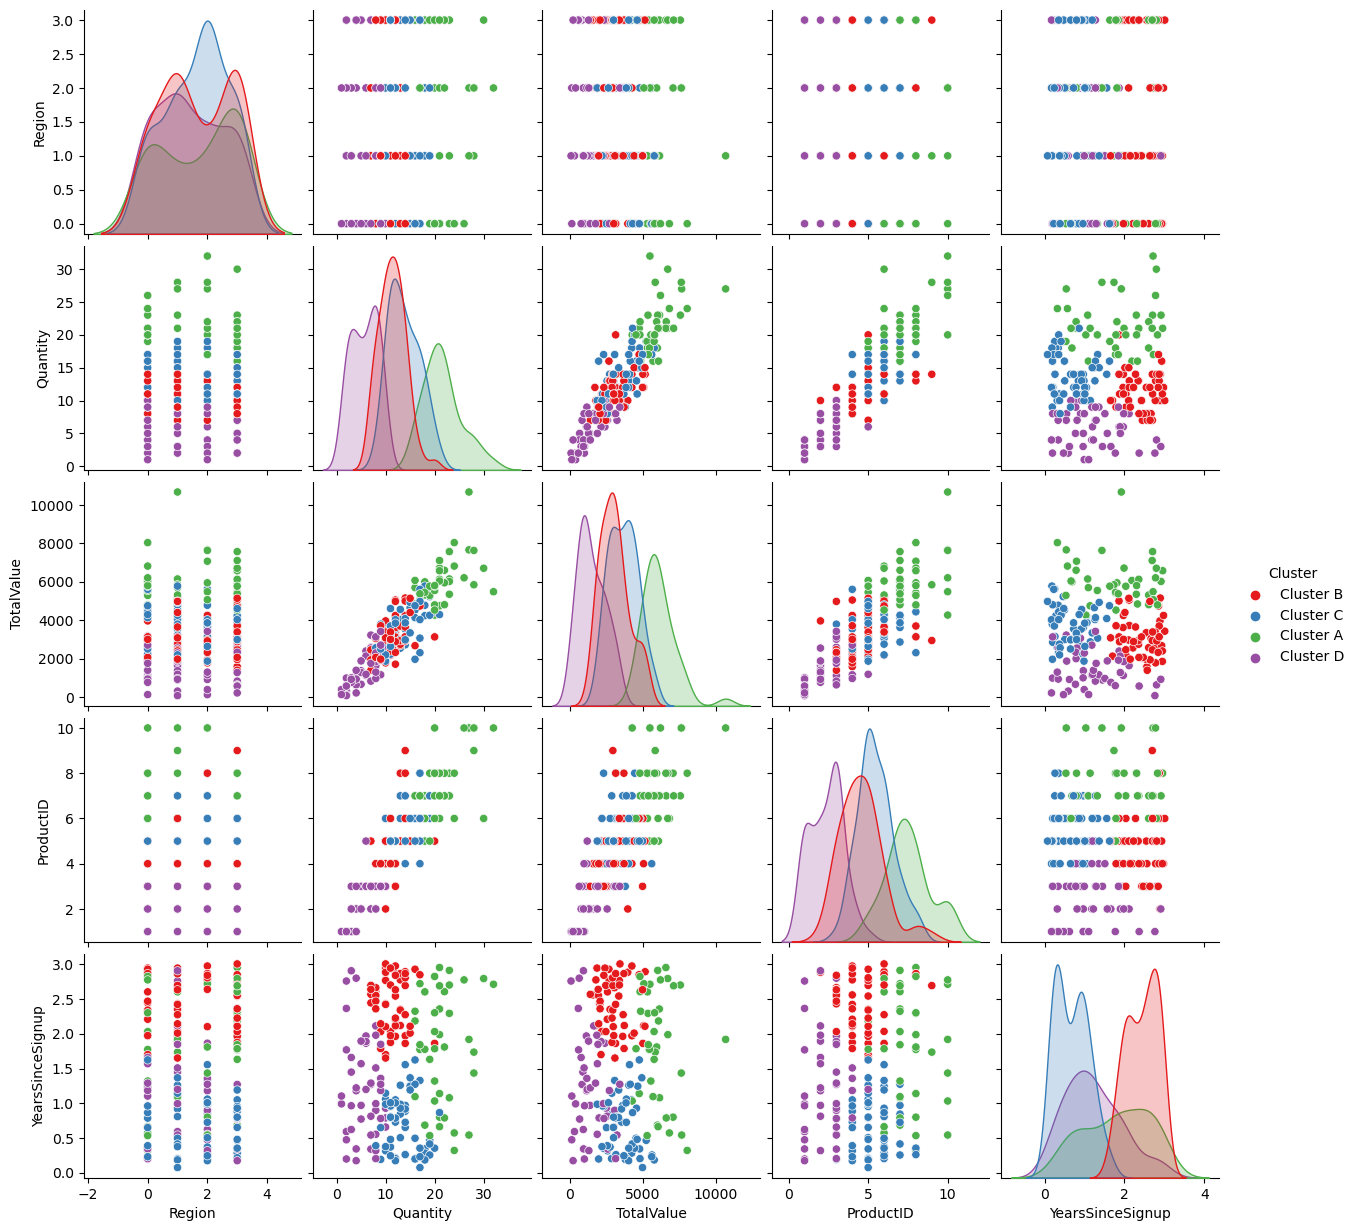

In [73]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(normalized_features)


# Create a mapping of cluster numbers to custom names
cluster_mapping = {
    0: 'Cluster A',
    1: 'Cluster B',
    2: 'Cluster C',
    3: 'Cluster D'
}

# Map the cluster numbers to new names
customer_features['Cluster'] = customer_features['Cluster'].map(cluster_mapping)

# Check the updated DataFrame
print(customer_features.head())

# Visualize the clusters with new names
sns.pairplot(customer_features, hue='Cluster', palette='Set1', diag_kind='kde')
plt.show()



In [74]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

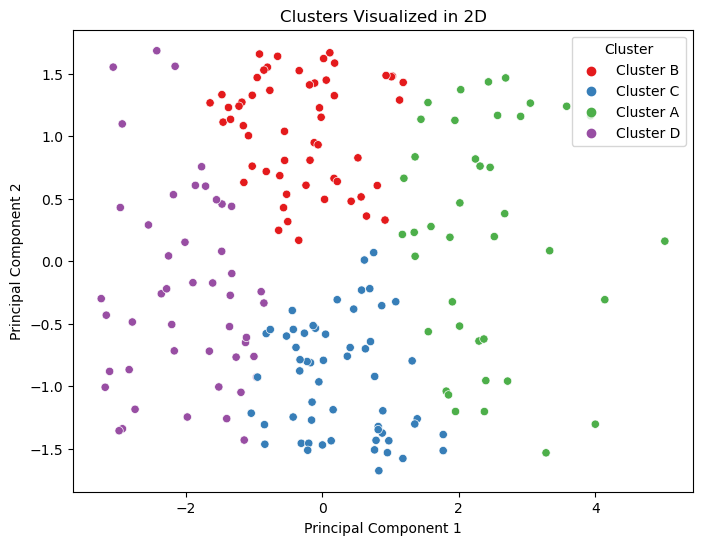

In [75]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=customer_features['Cluster'], 
    palette='Set1'
)
plt.title('Clusters Visualized in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### INSIGHTS ON CLUSTERING

In [76]:
# Aggregate metrics for each cluster
cluster_metrics = customer_features.groupby('Cluster').agg({
    'TotalValue': ['mean', 'sum'],  
    'Quantity': 'mean',            
    'YearsSinceSignup': 'mean'     
}).reset_index()

# Rename columns for better readability
cluster_metrics.columns = [
    'Cluster', 
    'Avg_Spending', 'Total_Spending', 
    'Avg_PurchaseFrequency', 
    'Avg_Lifetime'
]

# Display the updated cluster metrics
cluster_metrics



,Cluster,Avg_Spending,Total_Spending,Avg_PurchaseFrequency,Avg_Lifetime
0,Cluster A,6075.926500,243037.06,21.550000,1.802808
1,Cluster B,3053.885455,167963.70,11.345455,2.434570
2,Cluster C,3658.754386,208549.00,13.754386,0.689113
3,Cluster D,1498.846809,70445.80,5.680851,1.220635


# Cluster Insights

### 1. Cluster A
- **Spending**: Highest average spending (₹6075.93) and total spending.
- **Purchase Frequency**: Most frequent buyers (21.55 purchases on average).
- **Customer Lifetime**: Moderate tenure (1.80 years).
- **Insight**: These are **high-value customers** who frequently make large purchases. Likely to be your most profitable segment.

### 2. Cluster B
- **Spending**: Moderate average spending (₹3053.89).
- **Purchase Frequency**: Moderate purchase frequency (11.35 purchases).
- **Customer Lifetime**: Longest tenure (2.43 years).
- **Insight**: These are **loyal customers** who have been with the company for a long time but spend moderately.

### 3. Cluster C
- **Spending**: Moderate spending (₹3658.75).
- **Purchase Frequency**: Slightly higher than Cluster B (13.75 purchases).
- **Customer Lifetime**: Shortest tenure (0.69 years).
- **Insight**: These are **new customers** who show potential for growth, as their spending and frequency are already moderate despite their short tenure.

### 4. Cluster D
- **Spending**: Lowest average spending (₹1498.85) and total spending.
- **Purchase Frequency**: Least frequent buyers (5.68 purchases).
- **Customer Lifetime**: Relatively short tenure (1.22 years).
- **Insight**: These are **low-value, infrequent buyers**. They may need targeted promotions or re-engagement strategies.

---

## Suggestions for Actionable Strategies

- **Cluster A**: Focus on retention strategies (e.g., loyalty programs or exclusive deals).
- **Cluster B**: Engage with long-term customers to increase spending (e.g., upselling or personalized offers).
- **Cluster C**: Nurture these customers with targeted onboarding and engagement strategies to encourage loyalty and higher spending.
- **Cluster D**: Identify their barriers to purchase (e.g., price sensitivity or lack of interest) and re-engage with discounts or surveys to understand their needs.


---